Teil 2: Berechnung der mittleren Geschwindigkeiten
Die mittlere Geschwindigkeit zwischen t₁=0.2s und t₂=0.8s beträgt: 4.9050 m/s
Die mittlere Geschwindigkeit zwischen t₁=0.2s und t₂=0.6s beträgt: 3.9240 m/s
Die mittlere Geschwindigkeit zwischen t₁=0.2s und t₂=0.4s beträgt: 2.9430 m/s

Teil 4 & 6: Berechnung der Momentangeschwindigkeit
6. Die Formel für die Momentangeschwindigkeit v(t) = s'(t) lautet:
v(t) = 9.81⋅t

4. Die Momentangeschwindigkeit zur Zeit t₁ = 0.2s beträgt: 1.9620 m/s
(Hinweis: Man sieht, dass die mittleren Geschwindigkeiten sich diesem Wert annähern, je kleiner das Intervall wird.)

Teil 1, 3 & 5: Geometrische Interpretation im Plot
Der Plot wird jetzt generiert...


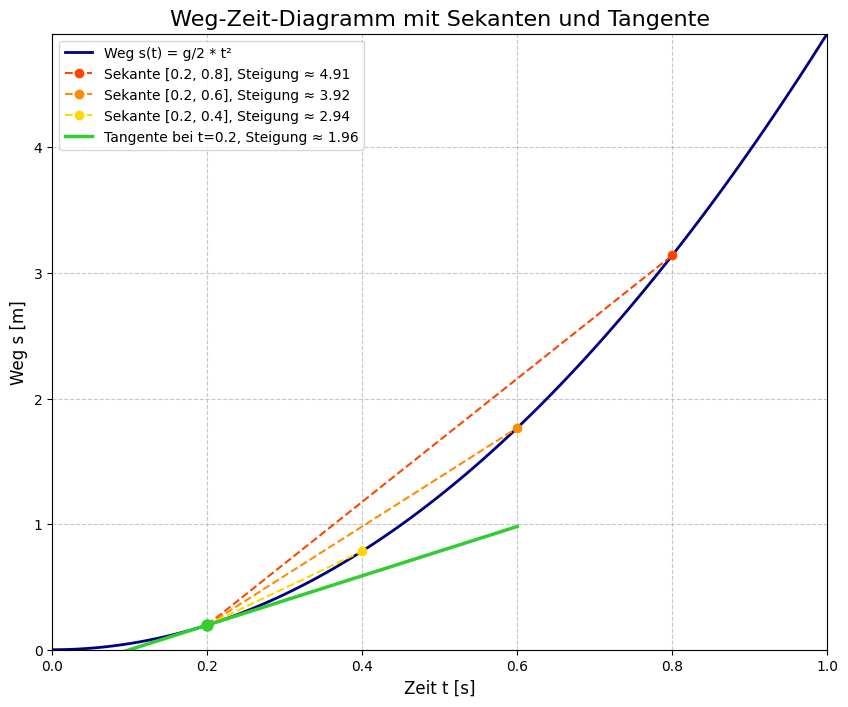

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# --- Grundkonstanten und Funktionsdefinition ---
g = 9.81  # Erdbeschleunigung in m/s^2

# Numerische Funktion für den Plot
def s(t):
    """Weg-Zeit-Gesetz für den freien Fall."""
    return (g / 2) * t**2

# --- Teil 2: Berechnung der mittleren Geschwindigkeiten ---
# Formel für die mittlere Geschwindigkeit (Sekantensteigung)
def mittlere_geschwindigkeit(t1, t2):
    return (s(t2) - s(t1)) / (t2 - t1)

# Die zu testenden Zeitintervalle
intervalle = [
    (0.2, 0.8),
    (0.2, 0.6),
    (0.2, 0.4)
]

print("="*50)
print("Teil 2: Berechnung der mittleren Geschwindigkeiten")
print("="*50)

# Berechne und speichere die Ergebnisse
mittlere_geschw_ergebnisse = []
for t1, t2 in intervalle:
    v_mittel = mittlere_geschwindigkeit(t1, t2)
    mittlere_geschw_ergebnisse.append(v_mittel)
    print(f"Die mittlere Geschwindigkeit zwischen t₁={t1}s und t₂={t2}s beträgt: {v_mittel:.4f} m/s")

# --- Teil 4 & 6: Berechnung der Momentangeschwindigkeit ---
# Wir verwenden SymPy für die symbolische Berechnung (Grenzwert/Ableitung)
print("\n" + "="*50)
print("Teil 4 & 6: Berechnung der Momentangeschwindigkeit")
print("="*50)

# Definiere die Symbole für die symbolische Rechnung
t_sym, t1_sym, t2_sym = sp.symbols('t t1 t2')

# Symbolische Weg-Zeit-Funktion
s_sym = (g / 2) * t_sym**2

# Teil 6: Momentangeschwindigkeit zu einem beliebigen Zeitpunkt t
# Das ist die erste Ableitung s'(t)
v_momentan_allgemein = sp.diff(s_sym, t_sym)
print("6. Die Formel für die Momentangeschwindigkeit v(t) = s'(t) lautet:")
sp.pretty_print(sp.Eq(sp.Symbol('v(t)'), v_momentan_allgemein))

# Teil 4: Momentangeschwindigkeit zur Zeit t₁ = 0.2
t1_wert = 0.2
v_momentan_t1 = v_momentan_allgemein.subs(t_sym, t1_wert)
print(f"\n4. Die Momentangeschwindigkeit zur Zeit t₁ = {t1_wert}s beträgt: {v_momentan_t1:.4f} m/s")
print("(Hinweis: Man sieht, dass die mittleren Geschwindigkeiten sich diesem Wert annähern, je kleiner das Intervall wird.)")


# --- Teil 1, 3 & 5: Skizze / Plot ---
print("\n" + "="*50)
print("Teil 1, 3 & 5: Geometrische Interpretation im Plot")
print("="*50)
print("Der Plot wird jetzt generiert...")

# Erstelle die Figur und die Achse für den Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Teil 1: Skizziere den Graphen von s(t)
t_werte = np.linspace(0, 1, 100)
s_werte = s(t_werte)
ax.plot(t_werte, s_werte, label='Weg s(t) = g/2 * t²', color='navy', linewidth=2)

# Teil 3: Zeichne die Sekanten für die mittleren Geschwindigkeiten
# Die Steigung dieser Linien sind die Werte aus Teil 2
farben = ['orangered', 'darkorange', 'gold']
for i, (t1, t2) in enumerate(intervalle):
    # Punkte für die Sekante
    punkte_t = [t1, t2]
    punkte_s = [s(t1), s(t2)]
    ax.plot(punkte_t, punkte_s, marker='o', linestyle='--', color=farben[i], 
            label=f'Sekante [{t1}, {t2}], Steigung ≈ {mittlere_geschw_ergebnisse[i]:.2f}')

# Teil 5: Zeichne die Tangente für die Momentangeschwindigkeit
# Die Steigung dieser Linie ist der Wert aus Teil 4
# Tangentengleichung: y = m*(x - x_p) + y_p
t_punkt = 0.2
s_punkt = s(t_punkt)
steigung_m = v_momentan_t1
# Erzeuge Punkte für die Tangentenlinie
t_tangente = np.linspace(t_punkt - 0.2, t_punkt + 0.4, 100)
s_tangente = steigung_m * (t_tangente - t_punkt) + s_punkt
ax.plot(t_tangente, s_tangente, color='limegreen', linewidth=2.5, 
        label=f'Tangente bei t=0.2, Steigung ≈ {steigung_m:.2f}')
ax.plot(t_punkt, s_punkt, 'o', color='limegreen', markersize=8) # Punkt hervorheben

# Plot-Layout
ax.set_title('Weg-Zeit-Diagramm mit Sekanten und Tangente', fontsize=16)
ax.set_xlabel('Zeit t [s]', fontsize=12)
ax.set_ylabel('Weg s [m]', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10)
ax.set_xlim(0, 1)
ax.set_ylim(0, s(1))

# Zeige den Plot an
plt.show()